In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("churn_data.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6335,7798-JVXYM,Female,0,No,No,14,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.65,921.4,No
1935,7297-DVYGA,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.85,996.95,No
5295,2144-BFDSO,Female,1,Yes,No,50,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),108.75,5431.9,No
581,3627-FHKBK,Female,0,No,No,1,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.30,75.3,Yes
5048,1360-JYXKQ,Female,1,Yes,No,54,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,99.10,5437.1,No


In [3]:
df.drop('customerID', axis = 'columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_21954/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

Loyal Customers

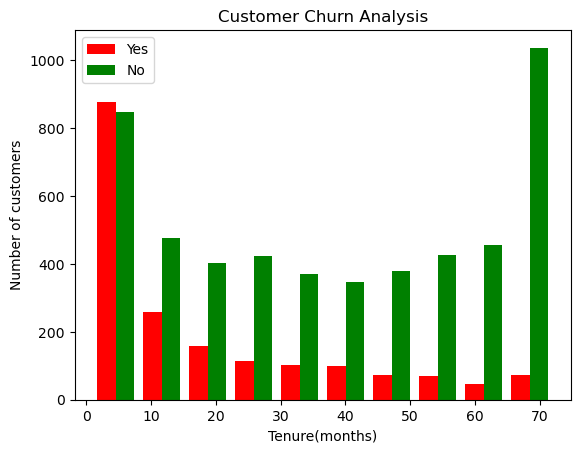

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel('Tenure(months)')
plt.ylabel('Number of customers')
plt.title('Customer Churn Analysis')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Yes', 'No'])
plt.legend()

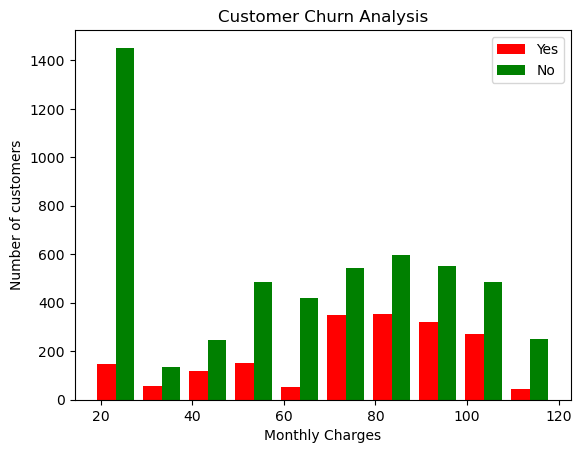

In [16]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Analysis')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Yes', 'No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_21954/4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_21954/4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 0, 'No' : 1}, inplace=True)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_21954/4025015724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 0, 'No' : 1}, inplace=True)


In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
df1[yes_no_columns]

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,0,1,1,1,1,0,1,1,1,1,0,1
1,1,1,0,1,0,1,0,1,1,1,1,1
2,1,1,0,1,0,0,1,1,1,1,0,0
3,1,1,1,1,0,1,0,0,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,1,0,0,0,0,0,1
7039,0,0,0,0,1,0,0,1,0,0,0,1
7040,0,0,1,1,0,1,1,1,1,1,0,1
7041,0,1,0,0,1,1,1,1,1,1,0,0


In [24]:
male_female = ['gender']

for col in male_female:
    df1[col].replace({'Male' : 1, 'Female' : 0}, inplace=True)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_21954/3007113260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Male' : 1, 'Female' : 0}, inplace=True)


In [25]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [27]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6986,0,0,0,1,30,0,0,1,0,1,0,0,1,0,94.10,2804.45,0,1,0,0,0,1,0,0
2510,1,0,1,1,1,0,0,1,1,1,1,1,1,0,74.25,74.25,0,1,0,0,0,0,0,1
6691,0,0,1,1,39,1,1,0,0,1,0,1,1,1,41.15,1700.90,1,0,0,1,0,0,0,0
3504,1,0,0,0,68,0,1,1,1,1,1,1,1,1,19.95,1377.70,1,0,1,0,1,0,0,0
6159,0,0,1,0,2,0,1,1,1,1,1,1,1,1,20.50,38.25,1,0,1,1,0,0,0,0


In [29]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5065,1,1,1,1,0.450704,0,0,1,1,1,1,1,1,0,0.066169,0.095661,1,0,1,1,0,0,0,0
3086,1,0,1,1,0.225352,0,0,1,1,0,0,1,0,0,0.770149,0.187076,1,1,0,0,0,0,0,0
1532,1,0,1,1,0.183099,0,1,1,1,1,1,1,1,1,0.013433,0.032495,1,0,1,0,0,1,0,0
2961,1,0,1,1,0.154930,0,1,1,0,1,0,1,1,0,0.353234,0.072681,1,0,0,0,0,0,0,1
4257,0,0,0,1,0.676056,0,1,1,0,0,1,0,0,1,0.807463,0.577683,1,1,0,0,0,0,1,0


In [31]:
X = df2.drop('Churn', axis = 'columns')
y = df2.Churn

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [33]:
X_train.shape

(5977, 23)

In [34]:
X_test.shape

(1055, 23)

In [35]:
len(X_train.columns)

23

In [41]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
  9/187 [>.............................] - ETA: 1s - loss: 0.7483 - accuracy: 0.3056 

2022-12-07 11:01:42.931414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 6ms/step - loss: 0.6077 - accuracy: 0.6846
Epoch 2/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4388 - accuracy: 0.7874
Epoch 3/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4200 - accuracy: 0.7982
Epoch 4/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.8037
Epoch 5/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4146 - accuracy: 0.8051
Epoch 6/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8046
Epoch 7/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4124 - accuracy: 0.8058
Epoch 8/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4127 - accuracy: 0.8027
Epoch 9/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4124 - accuracy: 0.8059
Epoch 10/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8029
E

187/187 [==============================] - 1s 6ms/step - loss: 0.3776 - accuracy: 0.8200
Epoch 82/100
187/187 [==============================] - 1s 6ms/step - loss: 0.3792 - accuracy: 0.8166
Epoch 83/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3771 - accuracy: 0.8195
Epoch 84/100
187/187 [==============================] - 1s 6ms/step - loss: 0.3774 - accuracy: 0.8198
Epoch 85/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3763 - accuracy: 0.8176
Epoch 86/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3774 - accuracy: 0.8168
Epoch 87/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3757 - accuracy: 0.8215
Epoch 88/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3760 - accuracy: 0.8215
Epoch 89/100
187/187 [==============================] - 1s 6ms/step - loss: 0.3747 - accuracy: 0.8198
Epoch 90/100
187/187 [==============================] - 1s 5ms/step - loss: 0.3756 - accuracy: 

In [43]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                480       
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 5ms/step - loss: 0.4791 - accuracy: 0.7773


2022-12-07 11:04:18.706668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.4790571331977844, 0.7772511839866638]

In [45]:
y_pred = model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


2022-12-07 11:05:13.846195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [53]:
y_pred[-5:]

array([[0.99782515],
       [0.38596284],
       [0.731004  ],
       [0.20578031],
       [0.94436246]], dtype=float32)

In [54]:
y_test[-5:]

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_21954/3327618466.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[-5:]


2213    1
4223    1
4623    1
3771    0
6470    1
Name: Churn, dtype: int64

In [55]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [56]:
y_predict[:15]

[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53       284
           1       0.82      0.89      0.85       771

    accuracy                           0.78      1055
   macro avg       0.72      0.68      0.69      1055
weighted avg       0.76      0.78      0.77      1055



Text(70.72222222222221, 0.5, 'Truth')

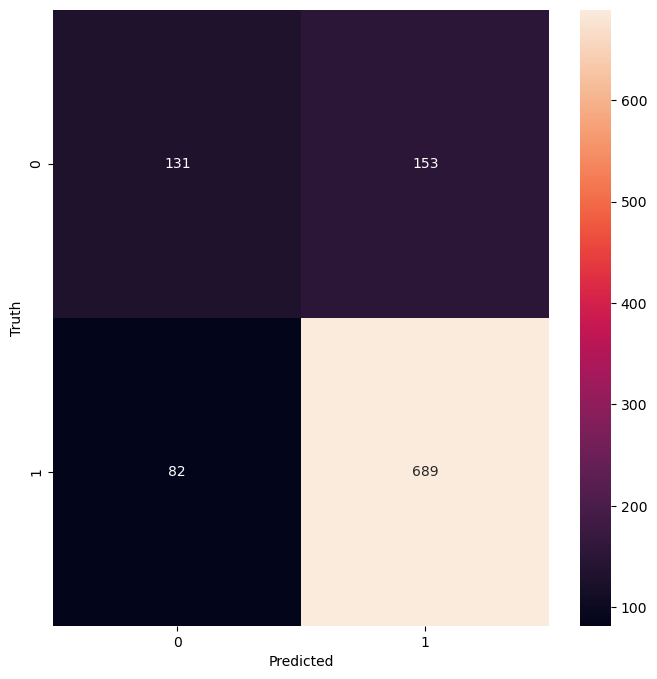

In [59]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy:

Ratio of total correct predictions/Total number of predictions

In [61]:
round((689+131)/(689+131+153+82),2)

0.78

Precison for class 0 who didnot left the service

Total correct predictions for class 0 / Total number of prediction class 0

In [67]:
round(131/(131 + 82), 2)

0.62

Precison for class 1 who left the service

Total correct predictions for class 1 / Total number of prediction class 1

In [66]:
round(689/(689+153),2)

0.82

Recall for class 0:

Number of correctly predicted class 0 / Total number of Actual class 0

In [68]:
round(131/(131+153), 2)

0.46

Recall for class 1:

Number of correctly predicted class 1 / Total number of Actual class 1

In [69]:
round(689/(689+82),2)

0.89

F1 score for any class:

Harmonic mean of precison and recall for any class label